In [1]:
from SantaFe import SantaFeAgent, SantaFeFood, SantaFeWorld
from SantaFe.Grammar import terminals
from grammaticalevolutiontools.evolution import cross_over, mutation
from matplotlib import pyplot as plt

from tqdm import tqdm
import random
import heapq

%matplotlib widget

In [2]:
AGENT_CMAP = {SantaFeAgent: 'red'}
OBJ_CMAP = {SantaFeFood: 'lime'}

In [3]:
world = SantaFeWorld()
best_agent = None
best_score = -1

num_generations = 5
num_agents = 20
num_to_keep = 2
num_to_regen = 5
num_ticks = 100

agents = [SantaFeAgent() for _ in range(num_agents)]
best_agents = []
best_agent = None

for gen in range(num_generations):
    print(f"GENERATION {gen + 1}: ")
    best_agents.clear()
    print('running agents...')
    for agent in tqdm(agents):
        world.reset_with_agent(agent)
        world.tick(num_ticks)

        if len(best_agents) < num_to_keep:
            heapq.heappush(best_agents, (agent.score + 1, agent))
        else:
            heapq.heapreplace(best_agents, (agent.score + 1, agent))

        if agent.score > best_score:
            best_agent = agent
            best_score = best_agent.score
            print(f'new best agent: {best_score}')

    print('creating new generation...')
    new_agents = [SantaFeAgent() for _ in range(num_to_regen)]

    while len(new_agents) < num_agents:
        weights, agents = zip(*best_agents)
        agent1, agent2 = random.choices(agents, weights=weights, k=2)
        prog1, prog2 = cross_over.cross_over(agent1.program, agent2.program)
        
        if random.random() < 0.7:
            mutation.mutate_terminals(prog1, num_mutations=2, terminal_types=terminals)
        if random.random() < 0.7:
            mutation.mutate_terminals(prog2, num_mutations=2, terminal_types=terminals)

        new_agents.append(SantaFeAgent(prog1))
        new_agents.append(SantaFeAgent(prog2))

    agents = new_agents


print(best_agent.score)
print(best_agent.program)

GENERATION 1: 
running agents...


 20%|██        | 4/20 [00:00<00:00, 30.69it/s]

new best agent: 6.0
new best agent: 7.0
new best agent: 11.0

 60%|██████    | 12/20 [00:00<00:00, 32.70it/s]

100%|██████████| 20/20 [00:00<00:00, 33.43it/s]


creating new generation...
GENERATION 2: 
running agents...


100%|██████████| 21/21 [00:01<00:00, 20.60it/s]


creating new generation...
GENERATION 3: 
running agents...


100%|██████████| 21/21 [00:00<00:00, 26.04it/s]


creating new generation...
GENERATION 4: 
running agents...


100%|██████████| 21/21 [00:00<00:00, 24.04it/s]


creating new generation...
GENERATION 5: 
running agents...


100%|██████████| 21/21 [00:00<00:00, 26.26it/s]

creating new generation...
0
if_wall_ahead(if_wall_ahead(Left, Move, dist=3), Move, dist=2)


In [4]:
world.reset_with_agent(best_agent, recording_on=True)
world.tick(num_ticks)
anim = world.generate_animation(
    bg_color='black', 
    agent_colors=AGENT_CMAP, 
    obj_colors=OBJ_CMAP,
    arrow_color='blue'
    )

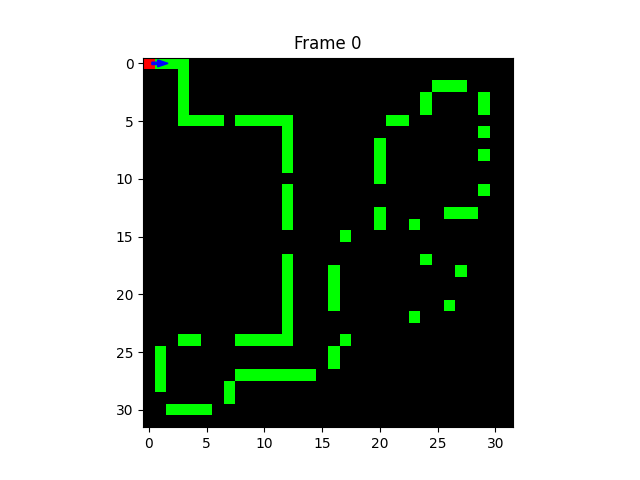

In [5]:
a = anim.play(pause=50)